In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
df_train = pd.read_csv('olist_order_payments_dataset.csv')
df_train

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


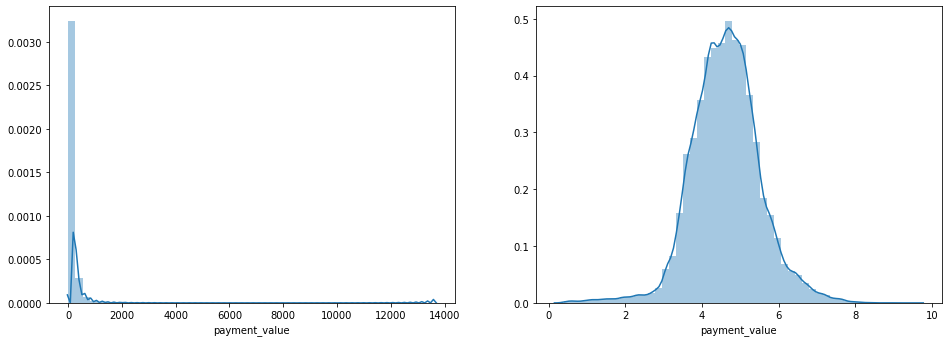

In [4]:
plt.figure(figsize=(16,12))
plt.subplot(221)
sns.distplot(df_train['payment_value'])

plt.subplot(222)
g1 = sns.distplot(np.log(df_train['payment_value']+1.5))

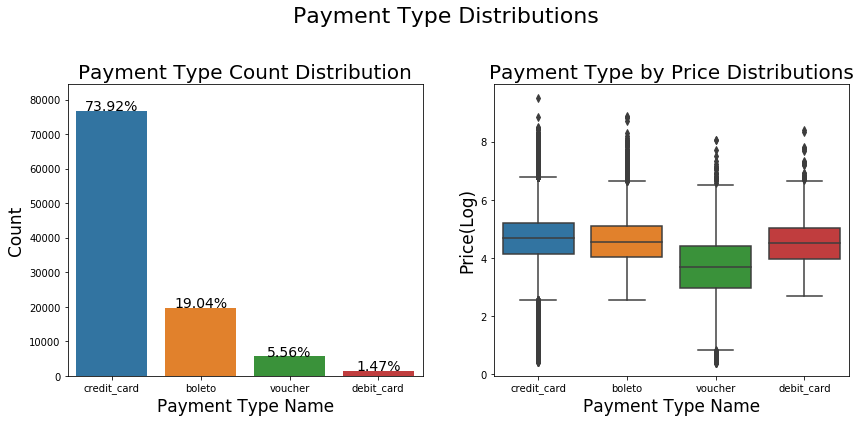

In [5]:
'''
Payment Type

    To start simple, I will start exploring the Most frequent Payment Type
    We also can see the price distributions between

'''
df_train['price_log'] = np.log(df_train['payment_value'] + 1.5)

total = len(df_train)

plt.figure(figsize=(14,6))

plt.suptitle('Payment Type Distributions', fontsize=22)

plt.subplot(121)
g = sns.countplot(x='payment_type', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type Count Distribution", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(122)
g = sns.boxplot(x='payment_type', y='price_log', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type by Price Distributions", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Price(Log)", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.8)

plt.show()



In [8]:
df_train.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
price_log               0
dtype: int64

Text(0.5, 1.0, 'Payment Type vs Amount Paid')

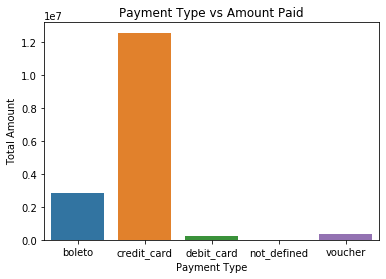

In [7]:
sum1=[]
group=[]
for groups,frame in df_train.groupby('payment_type'):
    sum1.append(sum(frame['payment_value']))
    group.append(groups)
plt.figure()
sns.barplot(x=group,y=sum1)
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.title('Payment Type vs Amount Paid')

Text(0.5, 0, 'Payment Type')

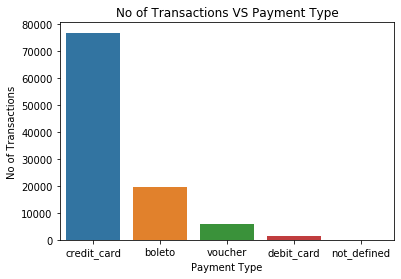

In [11]:
plt.figure()
sns.barplot(x=df_train['payment_type'].value_counts().index,y=df_train['payment_type'].value_counts().values)
plt.title('No of Transactions VS Payment Type')
plt.ylabel('No of Transactions')
plt.xlabel('Payment Type')

In [6]:
#od.to_csv('2new_olist_order_payments_dataset.csv',index=False)

In [8]:
pd.read_csv('new_olist_order_payments_dataset.csv')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
